In [ ]:
!pip install -e "/home/carlos_rocha/Documentos/POC/EasyOCR/"

In [2]:
from PIL import Image, ImageDraw
import easyocr

r = easyocr.Reader(
    ["pt"], gpu=False, 
    model_storage_directory="./pretrained_model",
    detect_network="craft_custom"
)

Using CPU. Note: This module is much faster with a GPU.


In [3]:
image_name = "report_0001-01"
# image_name = "report_0001-04"
img_path = f"/home/carlos_rocha/Documentos/POC/Streamfin/export/BBAS3_3t_2018/images/{image_name}.jpg"

In [4]:
response = r.readtext(img_path, output_format="dict")
response

[{'boxes': [[np.int32(112), np.int32(68)],
   [np.int32(181), np.int32(68)],
   [np.int32(181), np.int32(112)],
   [np.int32(112), np.int32(112)]],
  'text': 'ITR',
  'confident': np.float64(0.9989488331247581)},
 {'boxes': [[np.int32(204), np.int32(67)],
   [np.int32(623), np.int32(67)],
   [np.int32(623), np.int32(121)],
   [np.int32(204), np.int32(121)]],
  'text': 'Informações Trimestrais',
  'confident': np.float64(0.97806892782057)},
 {'boxes': [[np.int32(642), np.int32(67)],
   [np.int32(845), np.int32(67)],
   [np.int32(845), np.int32(116)],
   [np.int32(642), np.int32(116)]],
  'text': '31/03/2019',
  'confident': np.float64(0.999639840121055)},
 {'boxes': [[np.int32(864), np.int32(64)],
   [np.int32(1176), np.int32(64)],
   [np.int32(1176), np.int32(116)],
   [np.int32(864), np.int32(116)]],
  'text': 'BCO BRASIL S.A.',
  'confident': np.float64(0.6501922908850768)},
 {'boxes': [[np.int32(2240), np.int32(67)],
   [np.int32(2374), np.int32(67)],
   [np.int32(2374), np.int32(11

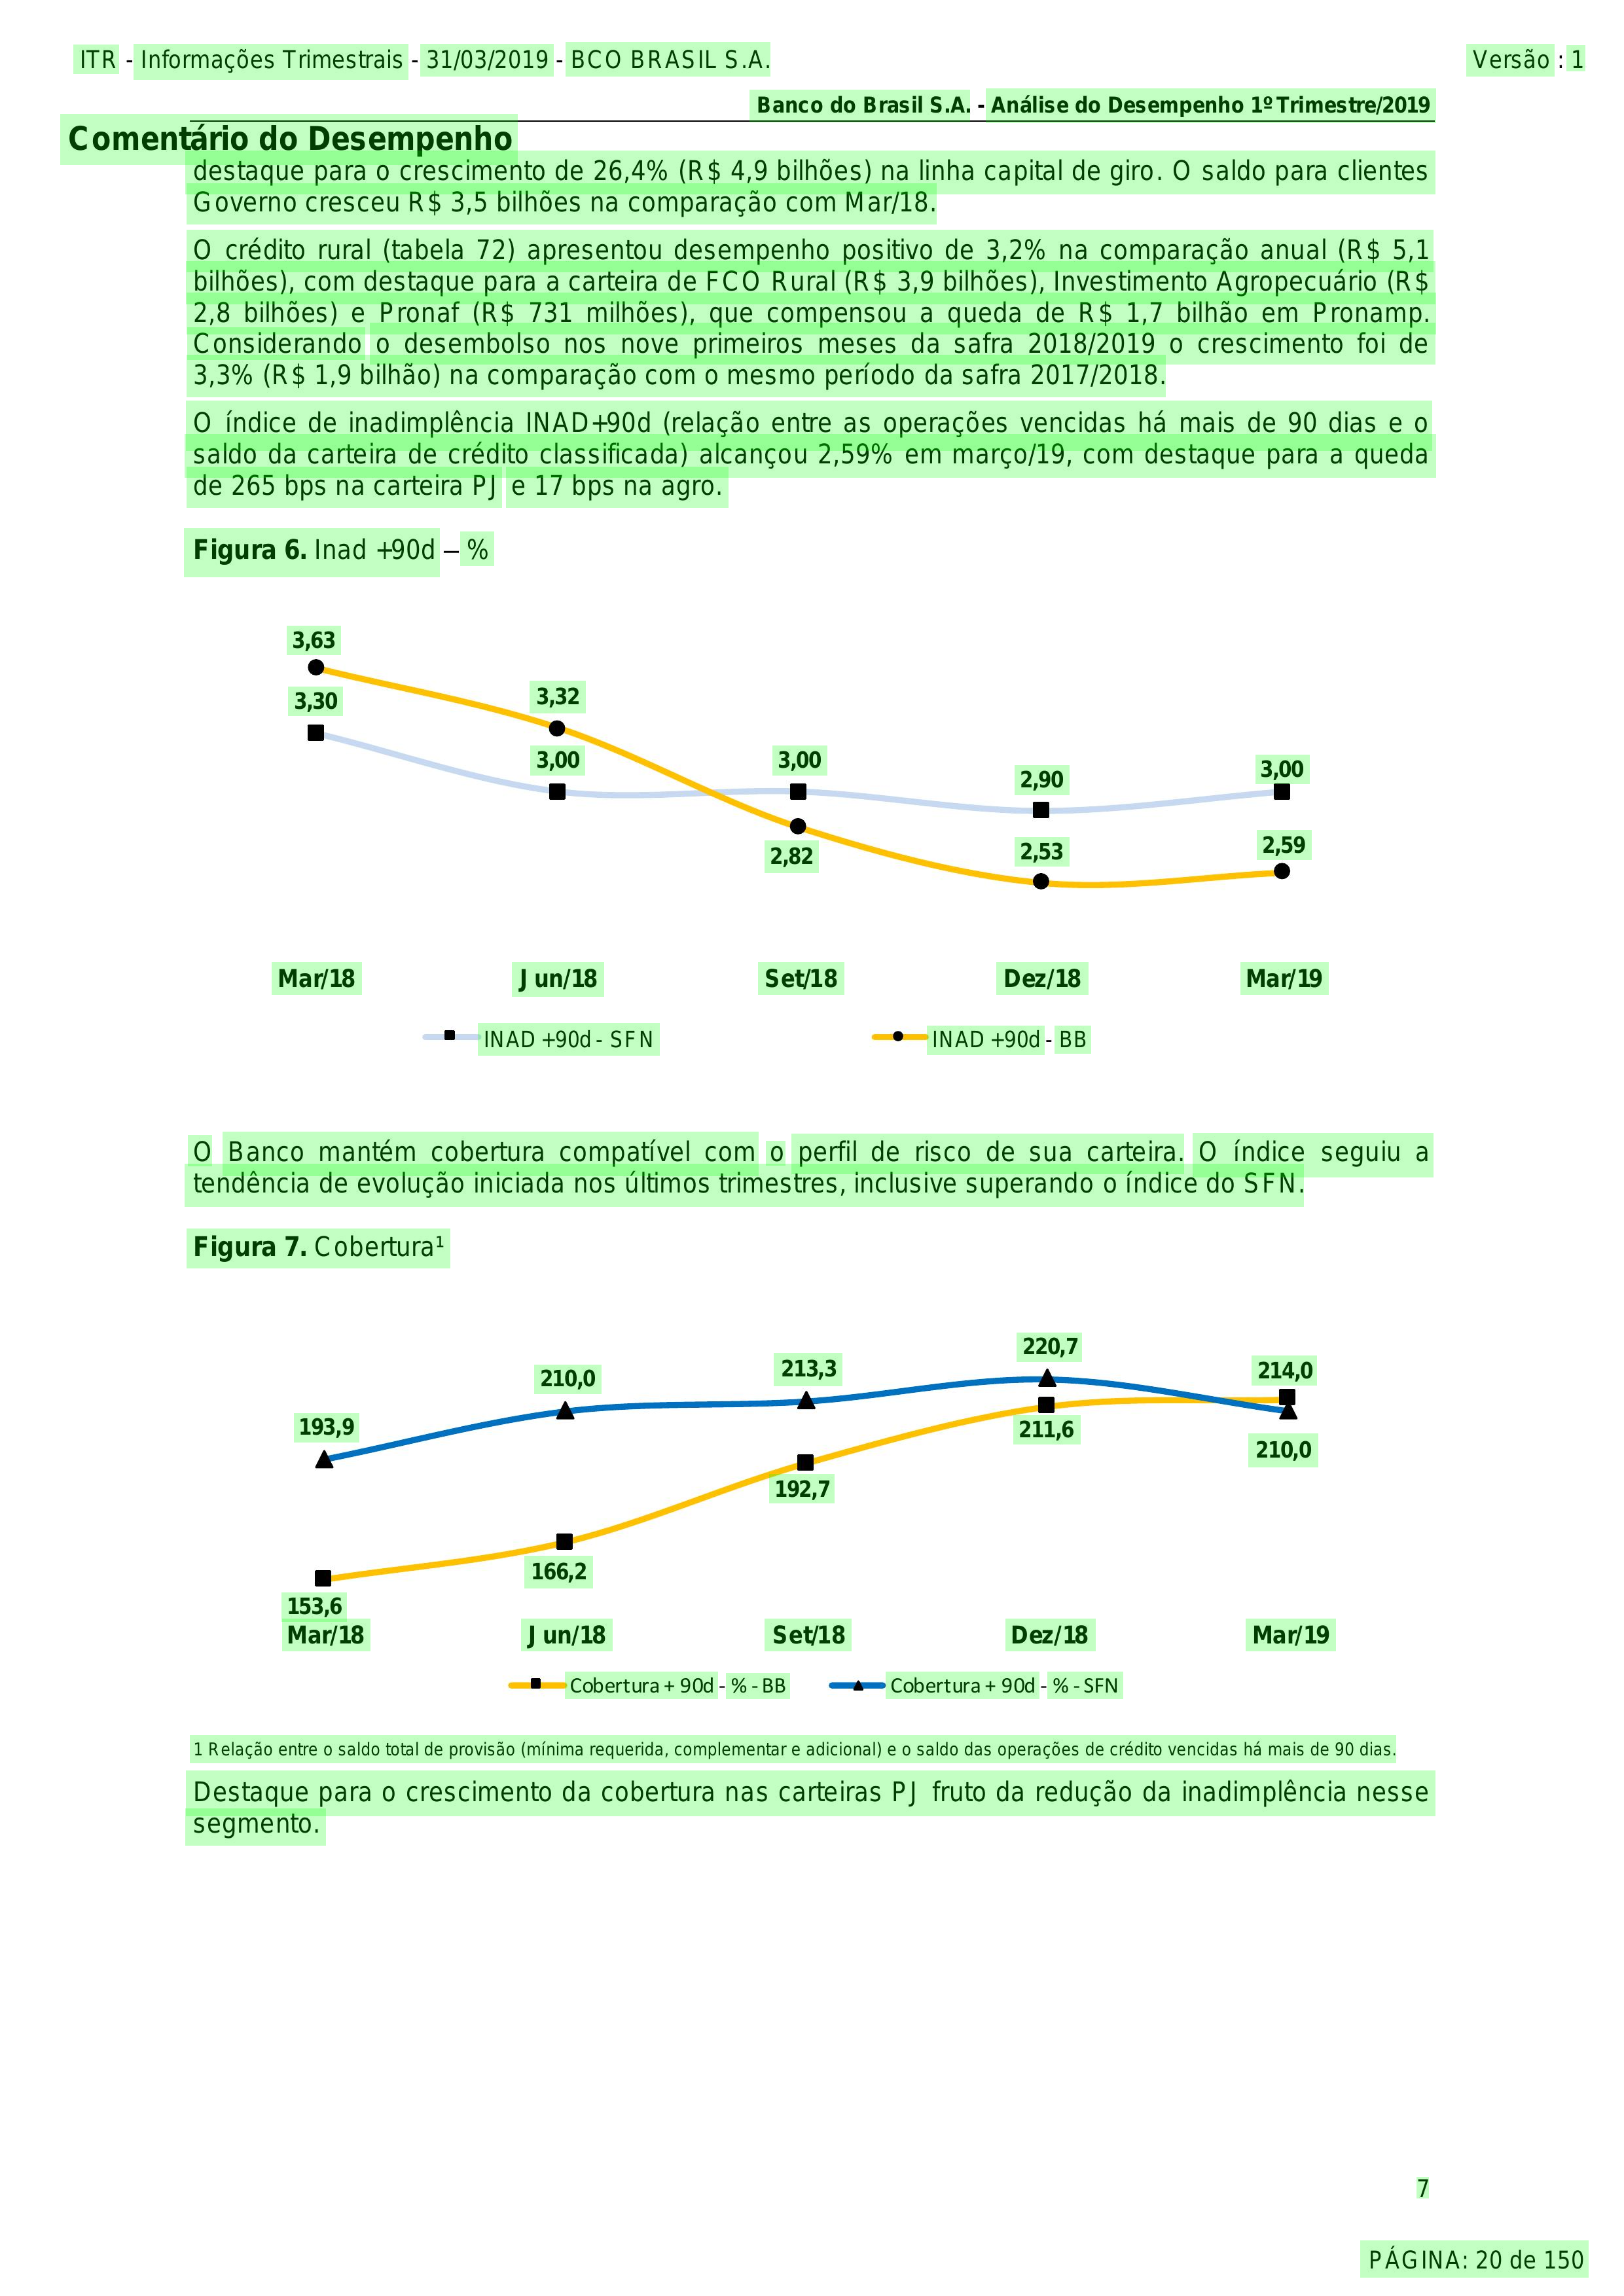

In [5]:
page_image = Image.open(img_path)
page_w, page_h = page_image.size

draw = ImageDraw.Draw(page_image, mode="RGBA")
color = (0, 255, 0, 60)
for word in response:
    x1, y1 = tuple(word["boxes"][0])
    x2, y2 = tuple(word["boxes"][2])
    
    draw.rectangle((x1, y1, x2, y2), fill=color)

page_image

In [6]:
' '.join([word["text"] for word in response])

'ITR Informações Trimestrais 31/03/2019 BCO BRASIL S.A. Versão 1 Banco do Brasil S.A. Análise do Desempenho 1ª Trimestre/2019 Comentário do Desempenho "destaque para "o "crescimento de 26,4% (R$ "4,9 bilhões) na linha capital de giro. O saldo para clientes "Governo cresceu R$ 3,5 bilhões na comparação com Mar/18. o crédito rural (tabela 72) apresentou desempenho positivo de 3,2% na comparação anual (R$ 5,1 "bilhões), "com destaque para  carteira de FC0 Rural (R$ "3,9 bilhões), Investimento Agropecuário (R$ "2,8 bilhões) e Pronaf (R$ 731 milhões), que compensou a queda de R$ 1,7 bilhão em Pronamp. Considerando o desembolso nos nove primeiros meses da safra 2018/2019 o crescimento foi de "3,3% (R$ 1,9 bilhão) na comparação com o mesmo período da safra 2017/2018. o índice de inadimplência INAD+90d (relação entre as operações vencidas há mais de 90 dias e o saldo da carteira de crédito classificada) alcançou "2,59% em "março/19, com destaque para  queda de 265 bps na carteira PJ e 17 bps n